# Let's start playing with some image data

In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

## Load the image of the Polaris Flare star-forming cloud

In [5]:
arr = np.load('polaris_img.npy')

### display the image to see what it looks like

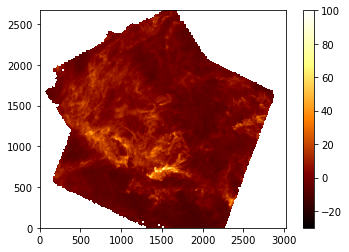

In [13]:
plt.imshow(arr,cmap = 'afmhot', vmax = 100)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## The colors show the brightness of thermal emission from interstellar dust in the cloud. What features of the morphology do you notice?

# Let's zoom in on the brightest part of the cloud. 

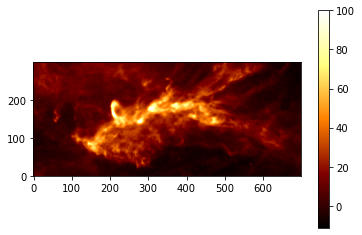

In [56]:
## Zoom in by cropping the image around the bright filament

# We've loaded the image data as a numpy array. 
# This is how to select a sub-region of the image, by indexing the array
# along both its axes 
# (first array axis is the vertical axis of the image, second array axis is the horizontal axis of the image)
# So we'll select pixels with y coordinates in the array 550 - 850 and x coordinates 1200-1900:
zoom_arr = arr[550:850,1200:1900]

# And plot the result like before
plt.imshow(zoom_arr,cmap = 'afmhot', vmax = 100)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## Next we can rotate the image so that the filament is more parallel to the x axis

In [27]:
# For this we will use the PIL library which has functions to manipulate image data
img = PIL.Image.fromarray(zoom_arr)
# A rotation is as simple as:
rot_img = img.rotate(15)

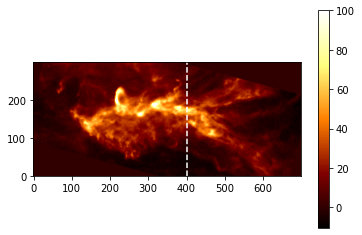

In [46]:
# Convert image into array for easier handling
rot_arr = np.asarray(rot_img)

# And plot the rotated image you made
plt.imshow(rot_arr,cmap = 'afmhot', vmax = 100)
plt.gca().invert_yaxis()
plt.colorbar()

plt.axvline(401, c='w', ls = '--')

## Next, we're going to extract a profile: the intensity of the image along a vertical line that cuts the filament almost perpendicular to its axis at some location

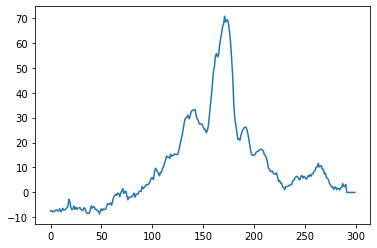

In [47]:

# Pixels with x = 401 seem good:
profile = rot_arr[:,401]

# And plot the profile as a line:
plt.plot(profile)

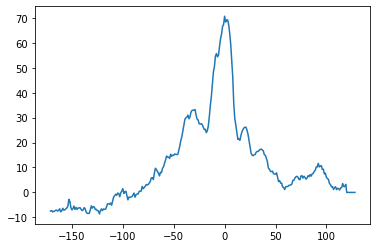

In [48]:
# Set the x value to be 0 at the peak

peak_loc = np.argmax(profile)

x = np.arange(0,len(profile))
x  = x - peak_loc

plt.plot(x, profile)

## Where does the profile reach half-max?

Half-max points are:  [157 180]
FWHM is  23  pixels
This corresponds to  0.2247992863514719 parsecs


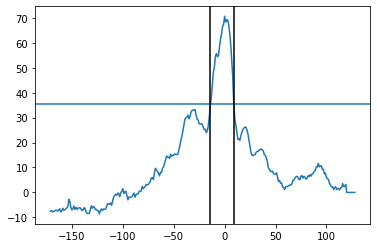

In [54]:
pmax = np.max(profile)

plt.plot(x, profile)
plt.axhline(pmax/2.)

half_max_points = np.where(np.abs(profile-pmax/2.) < 0.8)[0]

print('Half-max points are: ', half_max_points)
for i in half_max_points:
    plt.axvline(x[i], c='k')
    
print('FWHM is ', np.max(half_max_points) - np.min(half_max_points), ' pixels' )
print('This corresponds to ', ( np.max(half_max_points) - np.min(half_max_points) )*1.6e-3*3600/206264.*350 , 'parsecs' )

## Congratulations, now you've measured the width of the filament!